In [1]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Masking,Bidirectional, LSTM, RepeatVector, Dense, TimeDistributed,MaxPooling1D, Flatten, Conv1D,Conv2D,Dropout, MaxPooling2D # for creating layers inside the Neural Network
from keras.optimizers import Adam , SGD
# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
import numpy.ma as ma
# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version
from matplotlib import pyplot as plt

#file accessing
import os
# time stuff
from datetime import timedelta
import calendar


c:\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


Tensorflow/Keras: 2.9.0
pandas: 1.4.2
numpy: 1.22.4
sklearn: 1.1.1
plotly: 5.9.0


In [2]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  #epochs.remove(max(epochs))
  
  #rmse.drop(max(rmse))
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


##### Read from file and establish dataframe and future functions

In [3]:
df=pd.read_csv('InSAR_data_south/displacement/trainingvalidation.csv')
df=df.set_index([df.columns[0],df.columns[1]])
df.columns=pd.to_datetime(df.columns, format='%Y-%m-%d')
df=df.dropna(axis=0, how='all')#drop full nan rows

##### Remove next line to include all data

In [4]:
#df=df.iloc[500000:510000] #cuts data to long 120-119 approx
df

,,2014-11-08,2014-12-02,2014-12-26,2015-02-12,2015-03-08,2015-04-01,2015-04-25,2015-05-19,2015-06-12,2015-07-06,...,2018-10-18,2018-10-30,2018-11-11,2018-11-17,2018-11-23,2018-12-05,2018-12-17,2018-12-29,2019-01-10,2019-01-22
Longitude,Latitude,,,,,,,,,,,,,,,,,,,,,
-119.5609,36.1672,0.0,-5.35470,-2.365800,-5.38810,-8.0230,-7.35960,-10.658000,-11.5740,-14.73600,-15.653000,...,-51.2880,-52.2000,-51.5510,-50.8460,-52.1710,-51.1730,-51.0260,-51.1030,-53.1130,-53.6540
-119.5489,36.0072,0.0,-6.98510,-2.425400,-5.59300,-8.2796,-7.10480,-11.352000,-13.1490,-16.28400,-17.528000,...,-80.4520,-81.3120,-81.3700,-81.0500,-82.8020,-81.8950,-80.9560,-82.2640,-83.5630,-83.4070
-119.5369,36.0472,0.0,-6.52240,-2.652600,-7.67760,-11.1110,-10.59000,-14.676000,-17.0200,-20.39000,-22.219000,...,-82.7120,-83.1190,-82.8720,-82.5070,-84.1300,-83.3090,-83.1980,-83.6720,-84.9170,-84.5300
-119.5329,36.0152,0.0,-7.31990,-3.102300,-7.01660,-9.4511,-8.87950,-13.596000,-15.7800,-19.31200,-21.342000,...,-92.7010,-93.6410,-93.4770,-93.2590,-94.9470,-94.3050,-93.6450,-94.7880,-96.0660,-96.0170
-119.5289,35.9512,0.0,-5.69540,-0.297000,-1.17090,-3.5007,-0.99811,-3.422100,-3.9274,-5.57050,-4.514200,...,-31.5990,-31.9420,-31.8580,-31.5220,-32.9980,-32.5920,-31.5850,-32.0960,-33.1620,-32.8450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-118.9351,35.9912,0.0,1.31960,-0.454550,-1.12980,-2.1960,-2.29490,0.732390,-2.6491,-0.57953,-0.463840,...,3.3119,2.4877,3.7906,3.6429,3.8131,2.7015,5.1692,5.8056,3.2722,3.7133
-118.9331,35.8431,0.0,-0.27523,0.340730,0.11561,-1.8977,-1.72400,1.244300,-2.6508,0.44136,0.072182,...,5.3406,4.6145,5.8431,5.6430,5.8181,5.7786,7.0684,8.0765,5.0210,5.4701
-118.9311,35.6111,0.0,-2.60280,0.000017,0.94402,-2.1042,-1.87170,0.510950,-2.7147,0.42639,0.334300,...,4.6175,4.2846,5.3261,5.0863,5.6278,4.1805,6.4902,7.5899,4.7841,5.1107


# Timestep

In [5]:
timestep=10

# Shaping function (remove start and step for first for loop to include all data)

In [6]:
def shaping(datain, timestep):
    #print(arr)
    cnt=0
    for row in range(len(datain.index)): #picks a row at every iteration, allows to reduction of input and inclusion of multiple time series, remove start and step to run on full dataset 
    # Convert input dataframe to array and flatten
        #datain.iloc[row].fillna(datain.iloc[row].mean).to_numpy().flatten()
        arr=datain.iloc[row].interpolate().to_numpy().flatten() # flatten row
        #arr=arr.fillna(arr.mean)
        #arr=np.where(np.isnan(arr), ma.array(arr, mask=np.isnan(arr)).mean(), arr) 
        for mth in range(0, len(datain.columns)-(2*timestep)+1): # Define range lenght of the dates - 2* amount of timesep?? +1
            cnt=cnt+1 # Gives us the number of samples. Later used to reshape the data
            X_start=mth # Start month for inputs of each sample
            X_end=mth+timestep # End month for inputs of each sample
            Y_start=mth+timestep # Start month for targets of each sample. Note, start is inclusive and end is exclusive, that's why X_end and Y_start is the same number
            Y_end=mth+2*timestep # End month for targets of each sample.  
            
            # Assemble input and target arrays containing all samples
            if cnt==1:
                X_comb=arr[X_start:X_end]
                Y_comb=arr[Y_start:Y_end]
            else: 
                X_comb=np.append(X_comb, arr[X_start:X_end])
                Y_comb=np.append(Y_comb, arr[Y_start:Y_end])
    # Reshape input and target arrays
    X_out=np.reshape(X_comb, (cnt, timestep, 1))
    Y_out=np.reshape(Y_comb, (cnt, timestep, 1))
    return X_out, Y_out

##### Step 2 - Split and Shape data

In [7]:
test=pd.read_csv('InSAR_data_south/displacement/testset170.csv')
test=test.set_index([test.columns[0],test.columns[1]])
test.columns=pd.to_datetime(test.columns, format='%Y-%m-%d')
test=test.dropna(axis=0, how='all')#drop full nan rows
#train, test = train_test_split(df, test_size=0.2)
# creates sequences to train
#Need to decide on how to deal with rows with nans in them
X_train , Y_train = shaping(datain=df, timestep= timestep )
X_test, Y_test=shaping(test,10)
print(Y_test.shape)

nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = Y_train.shape
Y_train = Y_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))
nsamples, nx, ny = Y_test.shape
Y_test = Y_test.reshape((nsamples,nx*ny))
print(Y_test.shape)

(15470, 10, 1)
(15470, 10)


##### Step 3 - Specify the structure of a Neural Network, first model

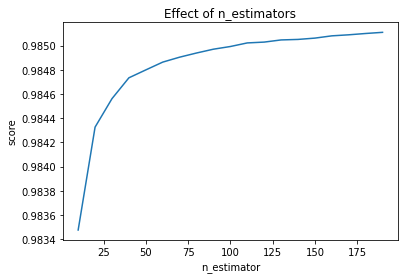

In [8]:
# set model
model = RandomForestRegressor(n_jobs = -1, random_state = 64)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)



In [9]:
pred_test=model.predict(X_test)

# pred_test = scaler2.inverse_transform(pred_test.reshape(-1, pred_test.shape[-1])).reshape(pred_test.shape)
y=pred_test.flatten()
z=[]
for x in range(910*95,910*96,10): #predictioon
    z.append(y[x])
z
b=Y_test.flatten() #Y test should match prediction
c=[] #wtf is this
for x in range(910*95,910*96,10):
    c.append(b[x])
y.size
X_test


array([[ 0.     , -7.2827 ,  1.7623 , ...,  2.4962 ,  0.98722,  2.4338 ],
       [-7.2827 ,  1.7623 ,  3.4042 , ...,  0.98722,  2.4338 ,  0.91733],
       [ 1.7623 ,  3.4042 , -0.12604, ...,  2.4338 ,  0.91733,  1.2025 ],
       ...,
       [ 2.9871 ,  2.9559 ,  2.4582 , ...,  2.551  ,  2.7136 ,  2.9668 ],
       [ 2.9559 ,  2.4582 ,  3.3708 , ...,  2.7136 ,  2.9668 ,  3.4686 ],
       [ 2.4582 ,  3.3708 ,  2.9002 , ...,  2.9668 ,  3.4686 ,  3.2524 ]])

In [10]:
# Plot (actual and predicted) for test (out of time) data
fig = go.Figure()

# #Trace for actual val
# fig.add_trace(go.Scatter(x=np.array(test.columns),
#                          y=np.array(test.values).flatten(),
#                          mode='lines',
#                          name='Subsidence - Actual (Test)',
#                          opacity=0.8,
#                          line=dict(color='black', width=1)
#                         ))
# fig.add_trace(go.Scatter(x=np.array(test.columns),
#                          y=e,
#                          mode='lines',
#                          name='Subsidence - Actual (YTrain)',
#                          opacity=0.8,
#                          line=dict(color='pink', width=1)
#                         ))

fig.add_trace(go.Scatter(x=np.array(test.columns[10:]),
                         y=c,
                         mode='lines',
                         name='Subsidence - Actual (YTest)',
                         opacity=0.8,
                         line=dict(color='grey', width=1)
                        ))


# Trace for predicted 
fig.add_trace(go.Scatter(x=np.array(test.columns[10:]),
                         y=z,
                         mode='lines',
                         name='Subsidence - Predicted ',
                         opacity=0.8,
                         line=dict(color='red', width=1)
                        ))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='Month-Year'
                )

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='Subsidence'
                )

# Set figure title
fig.update_layout(title=dict(text="Subsidence", font=dict(color='black')),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                 )
fig.show()

In [11]:
# from sklearn import tree
# Tree = model.estimators_[5]
# plt.figure(figsize=(25,15))
# tree.plot_tree(Tree,filled=True, 
#               rounded=True, 
#               fontsize=14);

Scores:Return the coefficient of determination of the prediction. R^2

In [12]:
scores

[0.9834764161519217,
 0.9843264393839439,
 0.9845615254687813,
 0.9847337957249469,
 0.9847990433588787,
 0.9848634216328926,
 0.9849042588193383,
 0.9849386904758249,
 0.9849702378062363,
 0.9849923367583759,
 0.9850219738877998,
 0.9850288263496237,
 0.9850466772950448,
 0.9850508851209631,
 0.9850617411231644,
 0.985080434682225,
 0.9850890378720045,
 0.9850999400108236,
 0.9851094514177896]

##### Train model

##### Step 4 - Plot loss over epochs

In [13]:
# Predicting the target values of the test set
Y_pred = model.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(Y_test, Y_pred)), '.3f'))
print("\nRMSE: ", rmse)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))



RMSE:  2.367
Mean Absolute Error: 1.730191806472464
Mean Squared Error: 5.603327831842854
Root Mean Squared Error: 2.3671349416209577


In [14]:
# Calculate the absolute errors
errors = abs(Y_pred - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.73 degrees.
Accuracy: 125.22 %.


c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



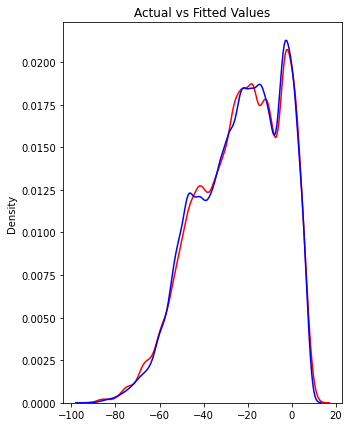

In [15]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

In [16]:
##### Step 5 - Print Performance Summary